In [743]:
# Import the required library to access Google Drive
from google.colab import drive

# Mount Google Drive to Colab so we can access files stored there
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [744]:
import pandas as pd

In [745]:
# Load dataset
file_path = "/content/drive/MyDrive/Task1/weather_data.csv"
df = pd.read_csv(file_path)

In [746]:
# Display the data types of each column in the DataFrame
df.dtypes

,0
date,object
avg_temperature,float64
humidity,float64
avg_wind_speed,float64
rain_or_not,object
cloud_cover,float64
pressure,float64


In [747]:
df.head(20)

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331
5,2023-01-06,24.148136,49.703435,6.587024,Rain,87.797432,995.818689
6,2023-01-07,23.671006,63.997418,5.654166,Rain,86.805669,998.296887
7,2023-01-08,32.245441,67.083073,6.940197,Rain,80.592540,963.347997
8,2023-01-09,30.078517,64.088581,4.520668,Rain,79.003044,958.060151
9,2023-01-10,31.620631,71.876470,11.214141,Rain,30.467914,1022.793931


In [748]:
df.shape

(311, 7)

In [749]:
df.isnull().sum()


,0
date,0
avg_temperature,15
humidity,15
avg_wind_speed,15
rain_or_not,0
cloud_cover,15
pressure,0


In [750]:
# Calculate the sum of null values for each column
column_null_sums = df.isnull().sum()

# Print the column sums of null values
column_null_sums


,0
date,0
avg_temperature,15
humidity,15
avg_wind_speed,15
rain_or_not,0
cloud_cover,15
pressure,0


In [751]:
#encode rain_or_not column as 0:not rain and 1:rain
df['rain_or_not'] = df['rain_or_not'].map({'Rain': 1, 'No Rain': 0}).astype(int)

In [752]:
#month year count from date column

import pandas as pd
# Convert 'Date' column to datetime objects if it's not already
df['date'] = pd.to_datetime(df['date'])

# Extract month and year
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# Group by month and year and count occurrences
month_year_counts = df.groupby(['Month', 'Year']).size().reset_index(name='Count')

month_year_counts


,Month,Year,Count
0,1,2023,31
1,2,2023,28
2,3,2023,31
3,4,2023,30
4,5,2023,31
5,6,2023,30
6,7,2023,31
7,8,2023,31
8,9,2023,30
9,10,2023,31


In [753]:
df.dtypes

,0
date,datetime64[ns]
avg_temperature,float64
humidity,float64
avg_wind_speed,float64
rain_or_not,int64
cloud_cover,float64
pressure,float64
Month,int32
Year,int32


In [754]:
# Group data by year and month, then calculate the median of temperature and other columns
median_temp_by_month_year = df.groupby(['Year', 'Month'])[['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover']].median().reset_index()

# Print the result
median_temp_by_month_year


,Year,Month,avg_temperature,humidity,avg_wind_speed,cloud_cover
0,2023,1,31.459814,68.769189,7.393089,44.502105
1,2023,2,32.049083,72.997768,7.535477,43.600478
2,2023,3,19.448844,32.244771,8.984929,46.556440
3,2023,4,17.363385,30.000000,6.533575,51.810031
4,2023,5,31.270318,71.343373,5.599640,29.653558
5,2023,6,31.374744,72.473352,6.049464,59.215212
6,2023,7,19.412050,30.000000,7.885353,65.616184
7,2023,8,19.222214,31.687688,6.060496,50.789199
8,2023,9,33.621848,72.005056,8.490987,57.073419
9,2023,10,29.779052,64.672892,8.519178,43.401937


In [755]:
# Group data by year and month, then calculate the median of temperature and other columns
median_temp_by_month_year = df.groupby(['Year', 'Month'])[['avg_temperature', 'humidity', 'avg_wind_speed','cloud_cover']].mean().reset_index()

# Print the result
median_temp_by_month_year

,Year,Month,avg_temperature,humidity,avg_wind_speed,cloud_cover
0,2023,1,30.549826,69.180210,8.153719,49.667940
1,2023,2,31.338441,71.392390,7.329421,44.508862
2,2023,3,19.287402,36.649469,10.135349,47.754999
3,2023,4,18.751721,34.831490,6.739471,57.076541
4,2023,5,30.603271,69.090748,5.838617,38.477645
5,2023,6,30.376952,69.230139,7.004550,53.100822
6,2023,7,19.251460,34.578504,7.454331,59.327748
7,2023,8,20.199350,36.197701,6.707141,48.249506
8,2023,9,32.269823,70.956517,7.747994,52.891720
9,2023,10,29.477285,66.389721,8.444469,47.053566


In [756]:
#imputed null values with the median of their specific month

# Create a copy of the DataFrame
df_imputed = df.copy()

# Group data by 'Year' and 'Month'
grouped = df_imputed.groupby(['Year', 'Month'])

# Iterate through each group and impute null values with the median
for (year, month), group in grouped:
    for col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']:
        median_val = group[col].median()
        df_imputed.loc[(df_imputed['Year'] == year) & (df_imputed['Month'] == month), col] = df_imputed.loc[(df_imputed['Year'] == year) & (df_imputed['Month'] == month), col].fillna(median_val)

# Display the imputed DataFrame
df_imputed


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,Month,Year
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681,1,2023
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025,1,2023
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357,1,2023
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142,1,2023
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331,1,2023
...,...,...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875,11,2023
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410,11,2023
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431,11,2023
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269,11,2023


In [757]:
#calculated null value sum

# Calculate the sum of null values for each column
column_null_sums = df_imputed.isnull().sum()

# Print the column sums of null values
column_null_sums


,0
date,0
avg_temperature,0
humidity,0
avg_wind_speed,0
rain_or_not,0
cloud_cover,0
pressure,0
Month,0
Year,0


In [758]:
#imputed null values with the mean of their specific month
# Create a copy of the DataFrame
df_imputed_mean = df.copy()

# Group data by 'Year' and 'Month'
grouped = df_imputed_mean.groupby(['Year', 'Month'])

# Iterate through each group and impute null values with the mean
for (year, month), group in grouped:
    for col in ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']:
        mean_val = group[col].mean()
        df_imputed_mean.loc[(df_imputed_mean['Year'] == year) & (df_imputed_mean['Month'] == month), col] = df_imputed_mean.loc[(df_imputed_mean['Year'] == year) & (df_imputed_mean['Month'] == month), col].fillna(mean_val)

# Display the imputed DataFrame
df_imputed_mean




,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,Month,Year
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681,1,2023
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025,1,2023
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357,1,2023
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142,1,2023
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331,1,2023
...,...,...,...,...,...,...,...,...,...
306,2023-11-03,22.072834,37.756910,4.729355,0,27.307081,954.564875,11,2023
307,2023-11-04,19.645885,42.190604,8.092369,0,51.807877,964.002410,11,2023
308,2023-11-05,23.884496,36.205508,11.860847,1,29.872557,977.681431,11,2023
309,2023-11-06,18.168418,34.785000,4.781288,0,94.067925,1047.153269,11,2023


##Ploting to check the most suitable imputation

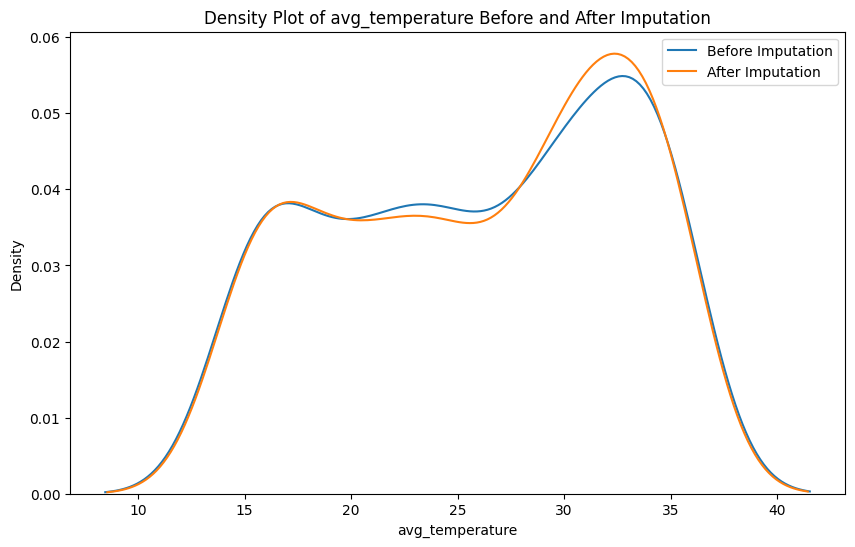

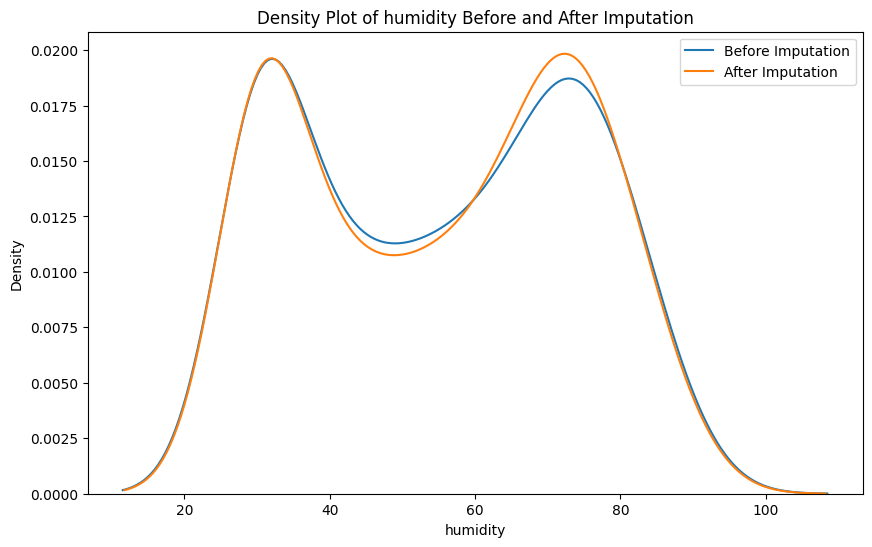

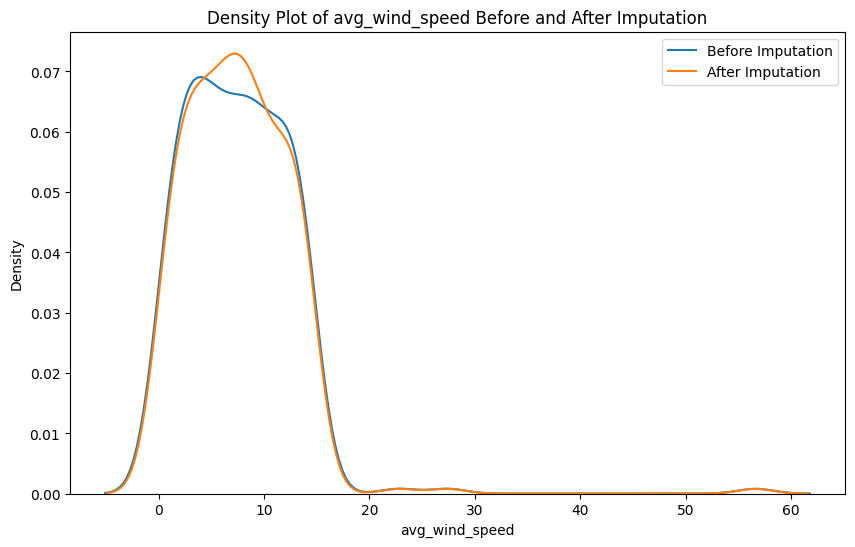

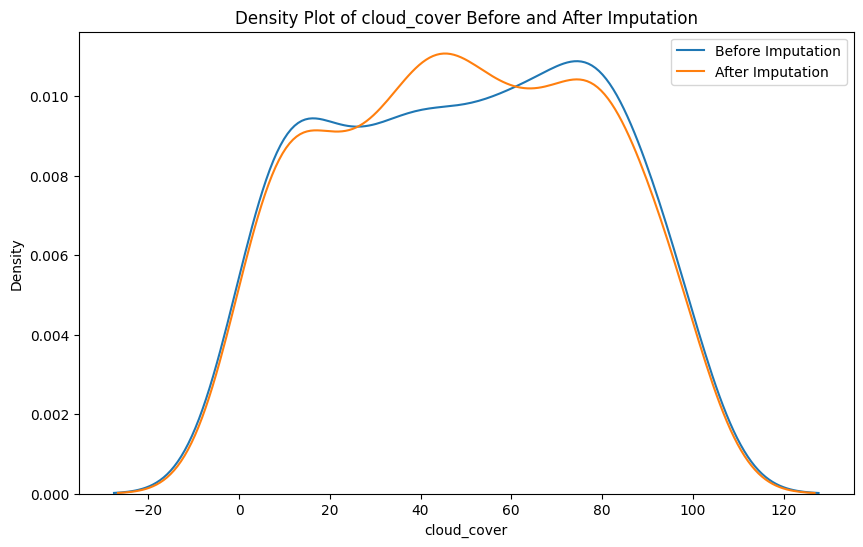

In [759]:
#before median imputation and after median imputation density graph for all columns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with imputed values
# and 'df_original' is your original DataFrame before imputation

# Create a copy to avoid modifying the original dataframe
df_original = df.copy()

# Select the columns for which you want to create density plots.
# Replace with actual column names.

numerical_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

    # Plot density for original data
    sns.kdeplot(df_original[col], label='Before Imputation')

    # Plot density for imputed data
    sns.kdeplot(df_imputed[col], label='After Imputation')

    plt.xlabel(col)  # Add x-axis label
    plt.ylabel('Density')  # Add y-axis label
    plt.title(f'Density Plot of {col} Before and After Imputation')  # Add title
    plt.legend()
    plt.show()


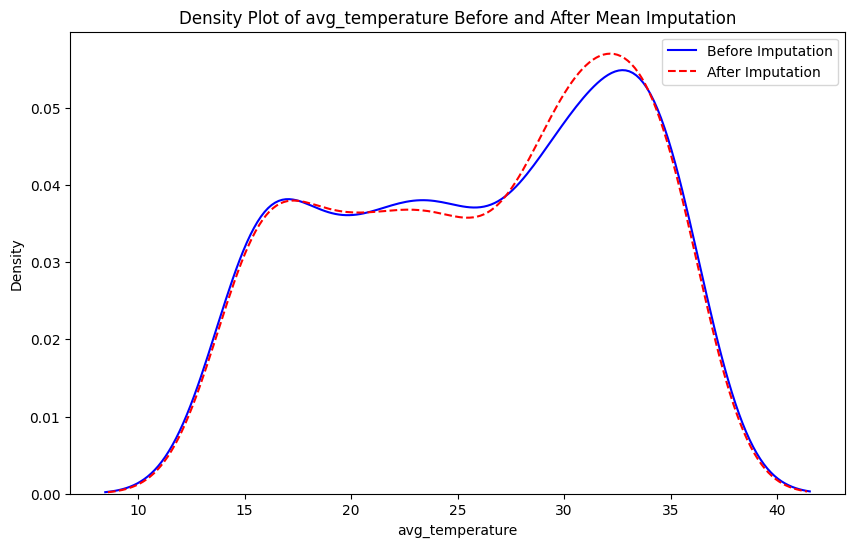

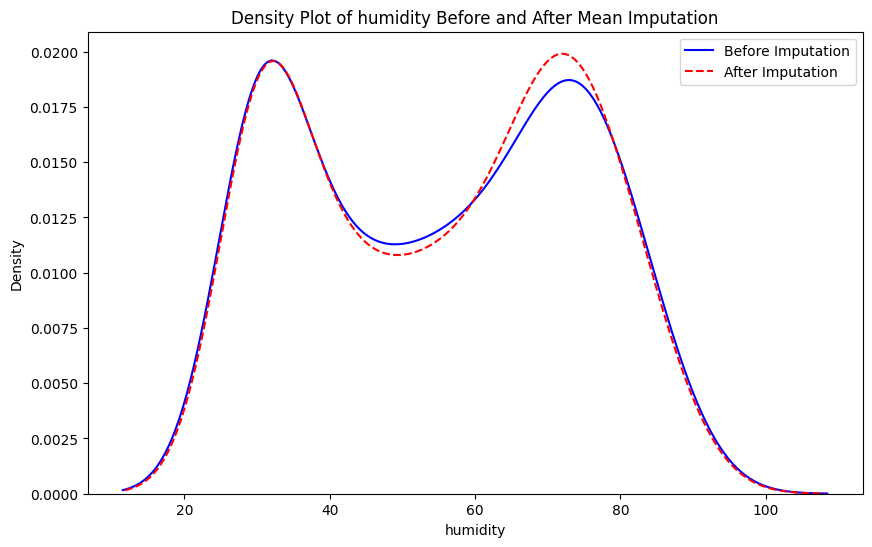

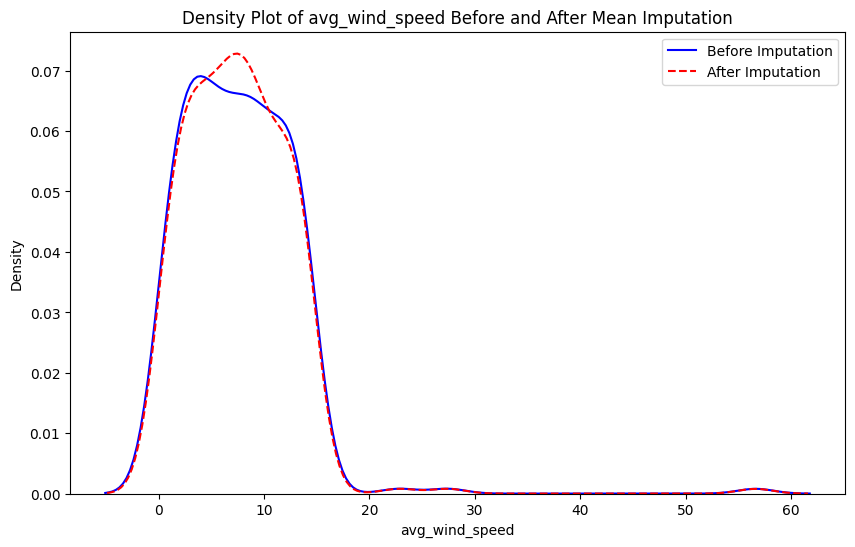

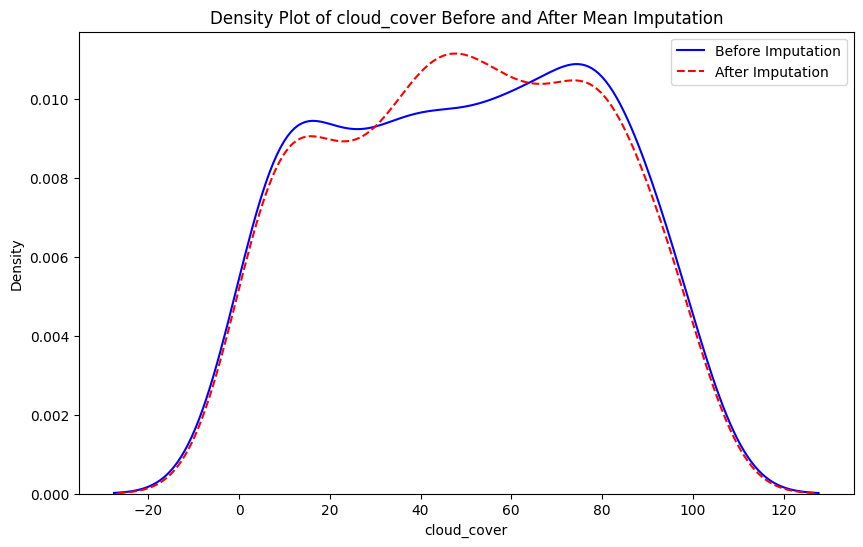

In [760]:
#before mean imputation and after mean imputation density graph for all columns

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your original DataFrame and 'df_imputed_mean' is your DataFrame after mean imputation
numerical_cols = ['avg_temperature', 'humidity', 'avg_wind_speed', 'cloud_cover']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[col], label='Before Imputation', color='blue', linestyle='-')
    sns.kdeplot(df_imputed_mean[col], label='After Imputation', color='red', linestyle='--')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f'Density Plot of {col} Before and After Mean Imputation')
    plt.legend()
    plt.show()


In [761]:
#categorise pressure levels
# Calculate min, max, and median pressure
min_pressure = df_imputed['pressure'].min()-1
max_pressure = df_imputed['pressure'].max()
median_pressure = df_imputed['pressure'].median()

# Function to encode pressure
def encode_pressure(pressure):
  if pressure <= median_pressure:
    if pressure <= min_pressure + (median_pressure - min_pressure) / 2:
      return 0  # Low
    else:
      return 1 # Medium

  else:
      return 2 # High

# Apply the function to create a new 'pressure_encoded' column
df_imputed['pressure_encoded'] = df_imputed['pressure'].apply(encode_pressure)

# Display the first few rows of the DataFrame to check the encoding
df_imputed.head(20)

#Now you have the new column pressure_encoded in your dataframe


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,Month,Year,pressure_encoded
0,2023-01-01,23.745401,46.140905,7.845981,1,20.851051,992.965681,1,2023,1
1,2023-01-02,30.030503,59.876587,5.382457,1,93.059521,1037.273025,1,2023,2
2,2023-01-03,28.365224,51.464618,13.158008,1,11.636640,1034.193357,1,2023,2
3,2023-01-04,27.550929,53.103799,5.886677,1,81.744971,968.610142,1,2023,0
4,2023-01-05,23.639303,57.826186,12.248992,1,38.062329,1030.264331,1,2023,2
5,2023-01-06,24.148136,49.703435,6.587024,1,87.797432,995.818689,1,2023,1
6,2023-01-07,23.671006,63.997418,5.654166,1,86.805669,998.296887,1,2023,1
7,2023-01-08,32.245441,67.083073,6.940197,1,80.592540,963.347997,1,2023,0
8,2023-01-09,30.078517,64.088581,4.520668,1,79.003044,958.060151,1,2023,0
9,2023-01-10,31.620631,71.876470,11.214141,1,30.467914,1022.793931,1,2023,2


In [762]:
# Calculate min, max, and median for avg_temperature
min_temp = df_imputed['avg_temperature'].min()
max_temp = df_imputed['avg_temperature'].max()
median_temp = df_imputed['avg_temperature'].median()

# Function to encode avg_temperature
def encode_temperature(temperature):
    if temperature <= median_temp:
        if temperature <= min_temp + (median_temp - min_temp) / 2:
            return 0  # Low
        else:
            return 1  # Medium
    else:
        return 2  # High

# Apply the function
df_imputed['avg_temperature'] = df_imputed['avg_temperature'].apply(encode_temperature)

# Calculate min, max, and median for humidity
min_humidity = df_imputed['humidity'].min()
max_humidity = df_imputed['humidity'].max()
median_humidity = df_imputed['humidity'].median()

# Function to encode humidity
def encode_humidity(humidity):
    if humidity <= median_humidity:
        if humidity <= min_humidity + (median_humidity - min_humidity) / 2:
            return 0  # Low
        else:
            return 1  # Medium
    else:
        return 2  # High

# Apply the function
df_imputed['humidity'] = df_imputed['humidity'].apply(encode_humidity)

# Calculate min, max, and median for avg_wind_speed
min_wind = df_imputed['avg_wind_speed'].min()
max_wind = df_imputed['avg_wind_speed'].max()
median_wind = df_imputed['avg_wind_speed'].median()

# Function to encode avg_wind_speed
def encode_wind_speed(wind_speed):
    if wind_speed <= median_wind:
        if wind_speed <= min_wind + (median_wind - min_wind) / 2:
            return 0  # Low
        else:
            return 1  # Medium
    else:
        return 2  # High

# Apply the function
df_imputed['avg_wind_speed'] = df_imputed['avg_wind_speed'].apply(encode_wind_speed)

# Display the first few rows to check the encoding
df_imputed.head(20)


,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure,Month,Year,pressure_encoded
0,2023-01-01,1,1,2,1,20.851051,992.965681,1,2023,1
1,2023-01-02,2,2,1,1,93.059521,1037.273025,1,2023,2
2,2023-01-03,2,1,2,1,11.636640,1034.193357,1,2023,2
3,2023-01-04,2,1,1,1,81.744971,968.610142,1,2023,0
4,2023-01-05,1,2,2,1,38.062329,1030.264331,1,2023,2
5,2023-01-06,1,1,1,1,87.797432,995.818689,1,2023,1
6,2023-01-07,1,2,1,1,86.805669,998.296887,1,2023,1
7,2023-01-08,2,2,1,1,80.592540,963.347997,1,2023,0
8,2023-01-09,2,2,1,1,79.003044,958.060151,1,2023,0
9,2023-01-10,2,2,2,1,30.467914,1022.793931,1,2023,2


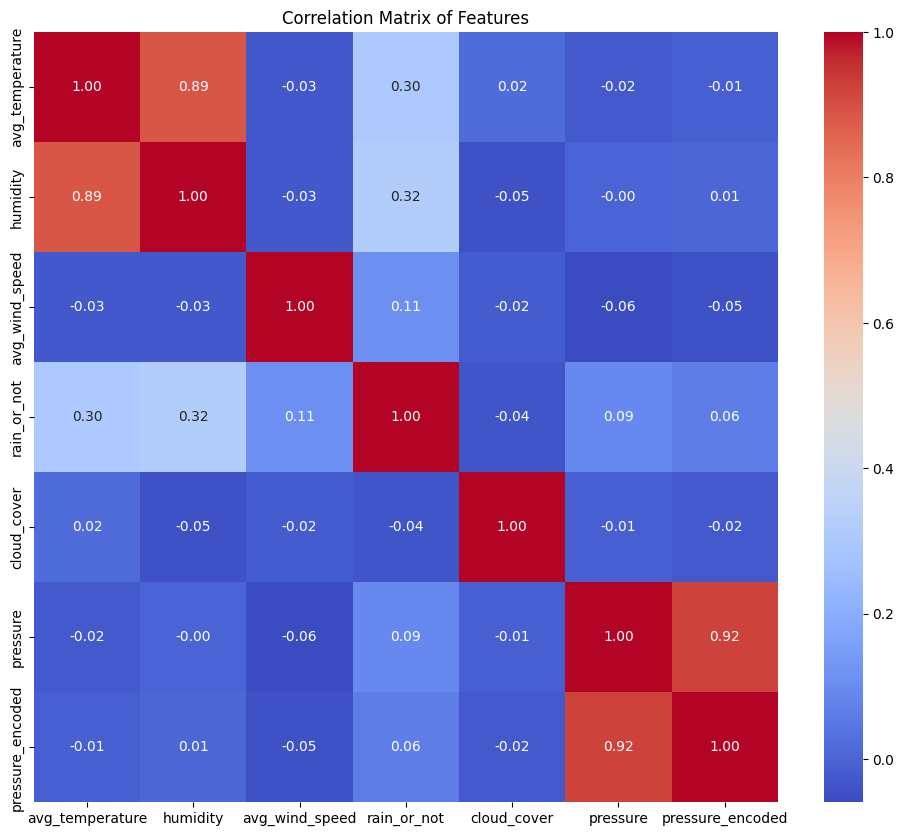

In [763]:
#correlation map

# Assuming df_imputed is your DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_imputed.drop(['date', 'Month', 'Year'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [764]:
#split the dataset as x,y to train and test without changing the order

# Define features (X) and target (y)
X = df_imputed.drop(['rain_or_not', 'date','Month','Year','pressure','cloud_cover'], axis=1)
y = df_imputed['rain_or_not']

# Compute the split point (80% training, 20% testing)
split_point = int(len(X) * 0.8)

# Train-Test Split (Sequential, without shuffling)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]


In [765]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA

# Function to train and evaluate classification models
def train_and_evaluate_classifier(model, model_name):
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    report = classification_report(y_test, y_pred)  # Generate classification report

    print(f"\n🔹 Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

    return model, accuracy, report

# Logistic Regression
logistic_model, logistic_accuracy, logistic_report = train_and_evaluate_classifier(LogisticRegression(), "Logistic Regression")

# Decision Tree
decision_tree_model, decision_tree_accuracy, decision_tree_report = train_and_evaluate_classifier(DecisionTreeClassifier(), "Decision Tree")

# Random Forest
random_forest_model, random_forest_accuracy, random_forest_report = train_and_evaluate_classifier(RandomForestClassifier(), "Random Forest")

# Support Vector Machine (SVM)
svm_model, svm_accuracy, svm_report = train_and_evaluate_classifier(SVC(), "SVM")

# K-Nearest Neighbors (KNN)
knn_model, knn_accuracy, knn_report = train_and_evaluate_classifier(KNeighborsClassifier(), "KNN")

# Naive Bayes
naive_bayes_model, naive_bayes_accuracy, naive_bayes_report = train_and_evaluate_classifier(GaussianNB(), "Naive Bayes")



🔹 Model: Logistic Regression
Accuracy: 0.7302
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.23      0.37        22
           1       0.71      1.00      0.83        41

    accuracy                           0.73        63
   macro avg       0.85      0.61      0.60        63
weighted avg       0.81      0.73      0.67        63


🔹 Model: Decision Tree
Accuracy: 0.6984
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.27      0.39        22
           1       0.70      0.93      0.80        41

    accuracy                           0.70        63
   macro avg       0.69      0.60      0.59        63
weighted avg       0.69      0.70      0.66        63


🔹 Model: Random Forest
Accuracy: 0.6984
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.27      0.39        22
           1       0.70      0.93   

In [766]:
#plot the above all model prediction with y_test

import plotly.graph_objects as go

# Assuming 'y_pred_lr', 'y_pred_dt', etc. are your model predictions
# Replace these with the actual variable names from your code

# Example predictions (replace with your actual predictions)
y_pred_lr = models["Logistic Regression"].predict(X_test)
y_pred_rf = models["Random Forest"].predict(X_test)
y_pred_nb = GaussianNB().fit(X_train, y_train).predict(X_test)


fig = go.Figure()

# Add traces for each model's predictions
fig.add_trace(go.Scatter(y=y_pred_lr, mode='lines+markers', name='Logistic Regression'))
fig.add_trace(go.Scatter(y=y_pred_rf, mode='lines+markers', name='Random Forest'))
fig.add_trace(go.Scatter(y=y_pred_nb, mode='lines+markers', name='Naive Bayes'))

# Add a trace for the actual values (y_test)
fig.add_trace(go.Scatter(y=y_test, mode='lines+markers', name='Actual Values (y_test)'))

fig.update_layout(title='Model Predictions vs. Actual Values',
                  xaxis_title='Data Point Index',
                  yaxis_title='Predicted/Actual Value')

fig.show()


In [767]:
df_imputed.dtypes

,0
date,datetime64[ns]
avg_temperature,int64
humidity,int64
avg_wind_speed,int64
rain_or_not,int64
cloud_cover,float64
pressure,float64
Month,int32
Year,int32
pressure_encoded,int64


In [768]:

import pandas as pd

# Assuming y_test, y_pred_rf, and y_pred_lr are already defined
# Create a DataFrame for the table
results_df = pd.DataFrame({
    'y_test': y_test,
    'Random Forest Predictions': y_pred_rf,
    'Logistic Regression Predictions': y_pred_lr
})

# Display the table
results_df


,y_test,Random Forest Predictions,Logistic Regression Predictions
248,0,1,1
249,1,1,1
250,0,1,1
251,0,1,1
252,0,1,1
...,...,...,...
306,0,0,0
307,0,0,0
308,1,1,1
309,0,0,0


In [769]:
# Ensure future dataset has all columns
for col in X.columns:
    if col not in future_21_days.columns:
        future_21_days[col] = df_imputed[col].mean()  # Fill missing columns with mean value

# Reorder columns to match training data
future_21_days = future_21_days[X.columns]

# Scale future data
future_21_days_scaled = scaler.transform(future_21_days)

# Predict probability of rain
rain_probabilities1 = logistic_model.predict_proba(future_21_days_scaled)[:, 1]
rain_probabilities2 = random_forest_model.predict_proba(future_21_days_scaled)[:, 1]

# Create DataFrame with Dates and Predictions
future_dates = pd.date_range(start=pd.Timestamp.today(), periods=21, freq='D')
forecast_df = pd.DataFrame({'Date': future_dates, 'Rain_Probability1': rain_probabilities1,'Rain_Probability': rain_probabilities2})

# Display forecast
print(forecast_df)


                         Date  Rain_Probability1  Rain_Probability
0  2025-03-09 20:07:37.230725           0.768927          0.965833
1  2025-03-10 20:07:37.230725           0.821608          0.585677
2  2025-03-11 20:07:37.230725           0.723052          0.962500
3  2025-03-12 20:07:37.230725           0.644482          0.875667
4  2025-03-13 20:07:37.230725           0.787325          0.821460
5  2025-03-14 20:07:37.230725           0.643493          0.958333
6  2025-03-15 20:07:37.230725           0.723919          0.948604
7  2025-03-16 20:07:37.230725           0.803056          0.965833
8  2025-03-17 20:07:37.230725           0.774133          0.948604
9  2025-03-18 20:07:37.230725           0.882336          0.619076
10 2025-03-19 20:07:37.230725           0.765505          0.922130
11 2025-03-20 20:07:37.230725           0.540035          0.362870
12 2025-03-21 20:07:37.230725           0.641300          0.958333
13 2025-03-22 20:07:37.230725           0.540093          0.89

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

